<a href="https://colab.research.google.com/github/eadewusic/Ekonify/blob/main/Summative_Intro_to_ml__%5BEunice_Adewusi%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency.


## Project Details

* **Name:** Ekonify
* **Aim:** To develop a machine learning-based waste classification system using publicly available datasets, demonstrating the applicability of AI in addressing urban waste challenges and optimising recycling processes.
* **Project Goal:** To develop an AI-powered waste classification system that can automatically identify and categorize waste into predefined classes, improving recycling efficiency and environmental sustainability.


**Dataset Used:** https://www.kaggle.com/datasets/mostafaabla/garbage-classification?select=garbage_classification


# Case Study and Implementation




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!kaggle datasets download -d mostafaabla/garbage-classification

Dataset URL: https://www.kaggle.com/datasets/mostafaabla/garbage-classification
License(s): ODbL-1.0
100% 238M/239M [00:12<00:00, 22.8MB/s]
100% 239M/239M [00:12<00:00, 19.9MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('garbage-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [ ]:
#Import Necessary Libraries
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image, ImageOps
from glob import glob
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import RandomFlip, RandomRotation, Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from tensorflow.keras import layers, models, Input, regularizers
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from tensorflow.keras.optimizers import Adam, RMSprop, AdamW, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2, l1_l2
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import joblib

# The Dataset

#### **Problem Statement**  
According to the World Bank's What a Waste 2.0 report, low-income countries often have recycling rates below 5%, compared to high-income countries where rates exceed 40%. Lagos faces similar challenges due to a growing population and limited waste management infrastructure. Manual sorting is time-consuming, costly, and prone to errors, while public unawareness worsens inefficiencies. While studies like TrashNet and Garbage Type Detection demonstrate the potential of machine learning in waste classification, their reliance on generalised datasets limits their adaptability to specific regions like Lagos. Additionally, these solutions lack integration with public engagement platforms, which are crucial for driving scalable, community-wide impact. How can AI bridge the gap in Lagos' waste management system and catalyse a greener, more sustainable future for its 20+ million residents?

#### **Dataset Description**  
The **"Garbage Classification (12 classes)"** dataset contains images of various types of waste categorized into 12 distinct classes. These categories represent common waste types found in recycling and disposal systems. The dataset is designed for training machine learning models, particularly deep learning models like Convolutional Neural Networks (CNNs), to classify waste accurately.  

**Key Features of the Dataset:**  
- **Number of Classes:** 12  
- **Waste Categories:**  
  - Battery  
  - Biological  
  - Brown Glass  
  - Cardboard  
  - Clothes  
  - Green Glass  
  - Metal  
  - Paper  
  - Plastic  
  - Shoes  
  - Trash  
  - White Glass  
- **Image Format:** RGB (3 channels)  
- **Typical Image Size:** Can be resized to **224x224x3** for CNN input  
- **Use Case:** Automated waste classification for recycling and environmental sustainability  

This dataset provides a solid foundation for building an AI-powered waste sorting system, helping reduce pollution and improve waste management processes.

In [ ]:
dataset_path = "/content/garbage_classification"

# Find image files inside all subfolders
image_files = glob(os.path.join(dataset_path, "*", "*.jpg")) + \
              glob(os.path.join(dataset_path, "*", "*.png")) + \
              glob(os.path.join(dataset_path, "*", "*.jpeg"))

if not image_files:
    print("No images found in subfolders.")
else:
    print(f"Found {len(image_files)} images.")

# Use the first image
first_image_path = image_files[0]
print("First image path:", first_image_path)

Found 15515 images.
First image path: /content/garbage_classification/trash/trash688.jpg


Image Size: (183, 276)
Number of Channels: 3
Found 15515 files belonging to 12 classes.
Batch size 16 works!
Found 15515 files belonging to 12 classes.
Batch size 32 works!
Found 15515 files belonging to 12 classes.
Batch size 64 works!


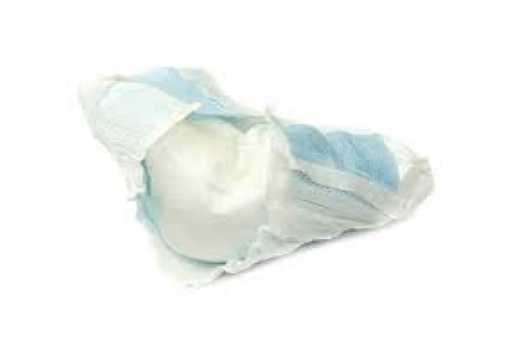

In [ ]:
# Load the first image
image = cv2.imread(first_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Get dimensions
IMAGE_SIZE = image.shape[:2]  # (height, width)
CHANNELS = image.shape[2]  # Number of channels

print("Image Size:", IMAGE_SIZE)
print("Number of Channels:", CHANNELS)

# Test batch sizes
for batch in [16, 32, 64]:
    try:
        dataset = tf.keras.preprocessing.image_dataset_from_directory(
            dataset_path,
            image_size=IMAGE_SIZE,
            batch_size=batch
        )
        print(f"Batch size {batch} works!")
    except:
        print(f"Batch size {batch} is too large!")

# Show the image
plt.imshow(image)
plt.axis("off")
plt.show()

In [ ]:
# Image dimensions
IMAGE_SIZE = (224, 224)  # Standardizing to 224x224
CHANNELS = 3  # RGB images
BATCH_SIZE = 32

In [ ]:
# Dataset directory
dataset_path = "/content/garbage_classification"

# Load training & validation datasets
train_dataset = image_dataset_from_directory(
    dataset_path,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),  # Forces resizing to (224, 224)
    batch_size=32  # Ensure batch size is correct
)

val_dataset = image_dataset_from_directory(
    dataset_path,
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),  # Forces resizing
    batch_size=32
)

# Print class names (categories)
class_names = train_dataset.class_names
print("Classes:", class_names)

Found 15515 files belonging to 12 classes.
Using 12412 files for training.
Found 15515 files belonging to 12 classes.
Using 3103 files for validation.
Classes: ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']


In [ ]:
#The length of the dataset
len(dataset)

243

In [ ]:
#A batch of 32 and each image now has size of 224 * 224 pixels
for image_batch, label_batch in train_dataset.take(1):
  print("Image batch shape:", image_batch.shape)
  print("Label batch shape:", label_batch.shape)
  print(label_batch.numpy())

Image batch shape: (32, 224, 224, 3)
Label batch shape: (32,)
[ 5  0  9  4  7  8  9  1  3  4  8  1  7  8  0 10 10  7  4  0  4  4  5  7
  5  4  9  4  4  1  8  9]


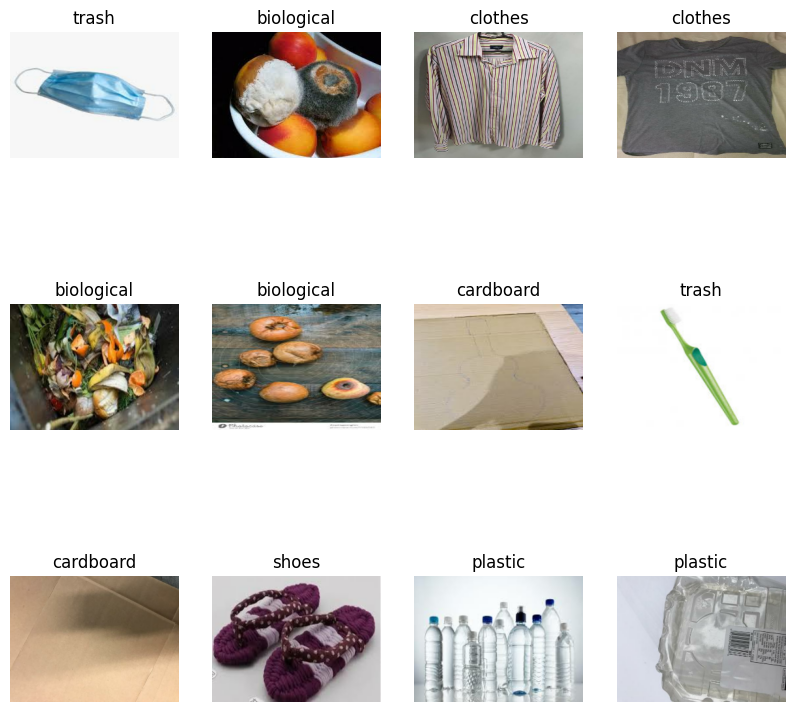

In [ ]:
#Viewing first 12 images in the batch
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [ ]:
# Normalize the pixel values
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
# Split training dataset further to create a test set
test_size = int(0.1 * len(train_dataset))
test_dataset = train_dataset.take(test_size)
train_dataset = train_dataset.skip(test_size)

print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")

Training samples: 350
Validation samples: 97
Test samples: 38


In [ ]:
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2)
])

# Apply to training dataset
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

#SECTION 1: Model Architecture:

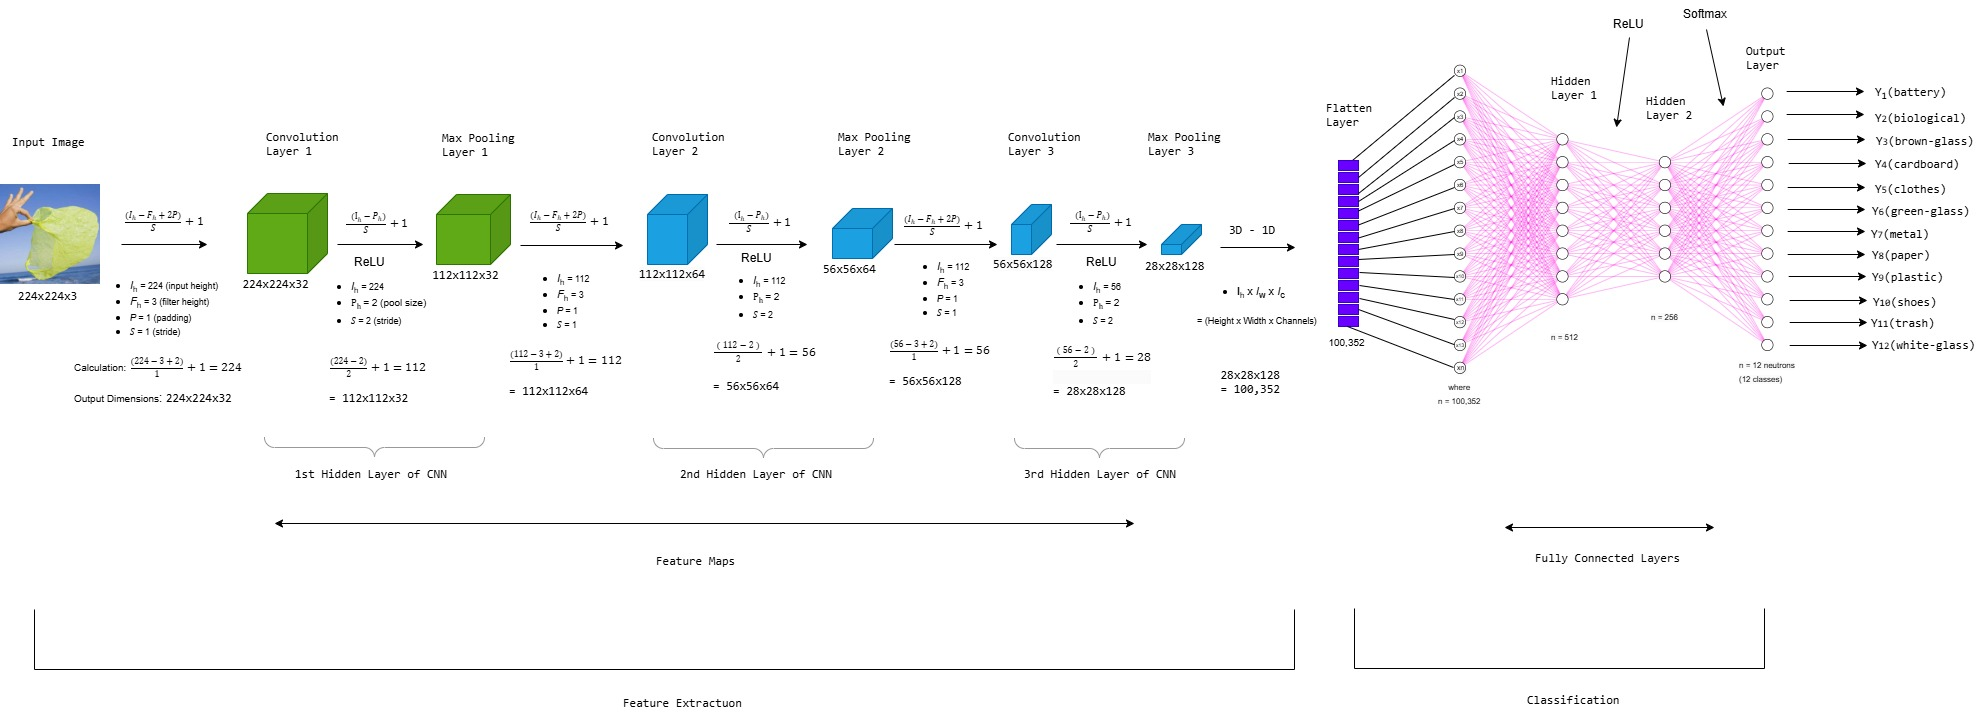


#Task: Define a function that creates models without and With specified Optimization techniques


## **Model 1: Baseline CNN (No Optimization)**
Starting with a simple CNN as a baseline.

In [ ]:
def create_baseline_model():
    model = models.Sequential([
        Input(shape=(224, 224, 3)),  # Explicit Input Layer
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(len(class_names), activation='softmax')  # Output layer
    ])

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

# Instantiate the model
baseline_model = create_baseline_model()
baseline_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,508 (42.61 MB)

 Trainable params: 11,170,508 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_baseline = baseline_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10  # Keep epochs low for the baseline
)

Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 871s 2s/step - accuracy: 0.4281 - loss: 1.8564 - val_accuracy: 0.6007 - val_loss: 1.1647
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 911s 3s/step - accuracy: 0.6111 - loss: 1.1527 - val_accuracy: 0.6387 - val_loss: 1.0617
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 844s 2s/step - accuracy: 0.6477 - loss: 1.0451 - val_accuracy: 0.6603 - val_loss: 1.0106
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 863s 2s/step - accuracy: 0.6777 - loss: 0.9619 - val_accuracy: 0.6822 - val_loss: 0.9828
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 868s 2s/step - accuracy: 0.7013 - loss: 0.8848 - val_accuracy: 0.7116 - val_loss: 0.9131
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 880s 3s/step - accuracy: 0.7309 - loss: 0.8204 - val_accuracy: 0.7238 - val_loss: 0.8887
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 871s 2s/step - accuracy: 0.7414 - loss: 0.7853 - val_accuracy: 0.7009 - val_loss: 0.9802
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 857s 2s/step - accuracy: 0.7404 - loss: 0.7761 - val_accu

In [ ]:
# check model's performance on unseen test data after training
test_perf_baseline = baseline_model.evaluate(test_dataset)
print(f"Baseline Model - Test Loss: {test_perf_baseline[0]}, Test Accuracy: {test_perf_baseline[1]}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 26s 676ms/step - accuracy: 0.7228 - loss: 0.8791
Baseline Model - Test Loss: 0.8362571001052856, Test Accuracy: 0.7310855388641357


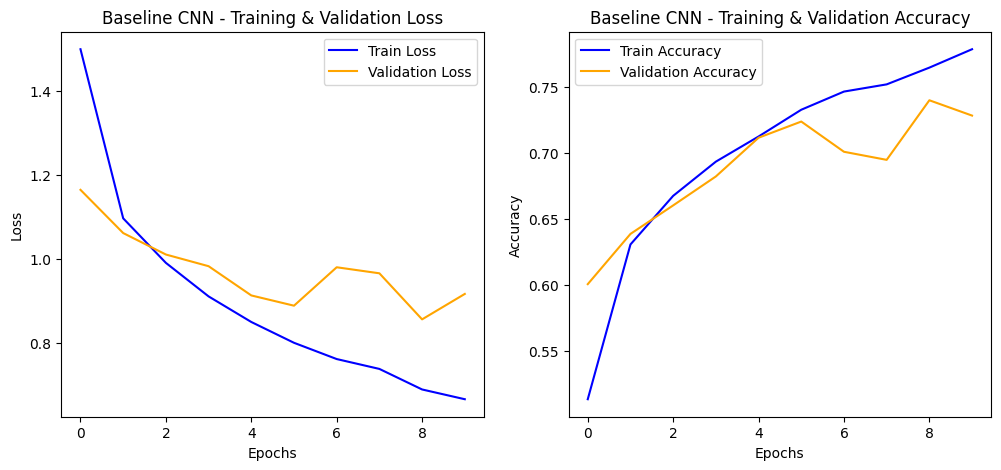

In [ ]:
# Improved Training & Validation Plot
def plot_history(history, model_name="Model"):
    plt.figure(figsize=(12, 5))

    # Training and Validation Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} - Training & Validation Loss')
    plt.legend()

    # Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Training & Validation Accuracy')
    plt.legend()

    plt.show()

# Plot the graphs
plot_history(history_baseline, "Baseline CNN")

First image to predict:
Actual label on dataset: clothes
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step
Predicted label by model: clothes


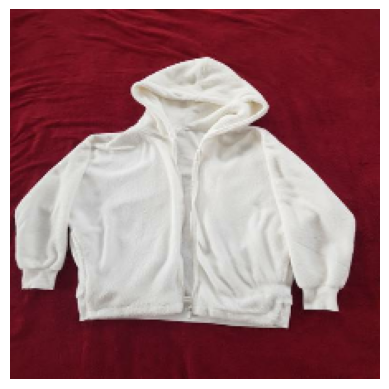

In [ ]:
# Making a single prediction
for images_batch, labels_batch in test_dataset.take(1):
    img_1 = images_batch[0].numpy()  # Remove 'uint8' conversion so image can retain [0, 1] instead of [0, 255]
    img1_label = labels_batch[0].numpy()

    print('First image to predict:')
    plt.imshow(img_1)
    print('Actual label on dataset:', class_names[img1_label])

    batch_prediction = baseline_model.predict(images_batch)
    predicted_label = class_names[np.argmax(batch_prediction[0])]

    print('Predicted label by model:', predicted_label)
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


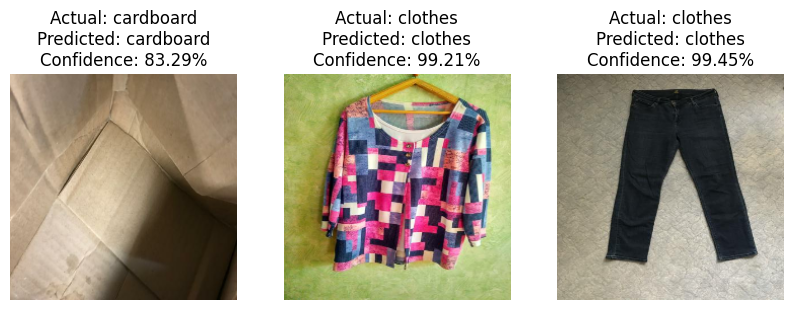

In [ ]:
# Making more predictions
def predict(model, img):
    # Convert image to array and expand dims for prediction
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Model expects batch format

    predictions = baseline_model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence_level = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence_level

plt.figure(figsize=(10, 10))
for images, labels in test_dataset.take(1):
    for i in range(3):  # Predict for 3 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())

        predicted_class, confidence_level = predict(baseline_model, images[i].numpy())
        actual_class = class_names[labels[i].numpy()]  # Ensure correct label index

        plt.title(f'Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence_level}%')
        plt.axis("off")

plt.show()

In [ ]:
#Since Baseline CNN is a Keras model, the best way to save it is using the .keras format

# Create the directory if it doesn't exist
os.makedirs("saved_models", exist_ok=True)

# Now save the model
baseline_model.save("saved_models/baseline_cnn.keras")

In [ ]:
print("Saved models:", os.listdir("saved_models"))

Saved models: ['baseline_cnn.keras', 'optimized_cnn.keras']


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 969ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

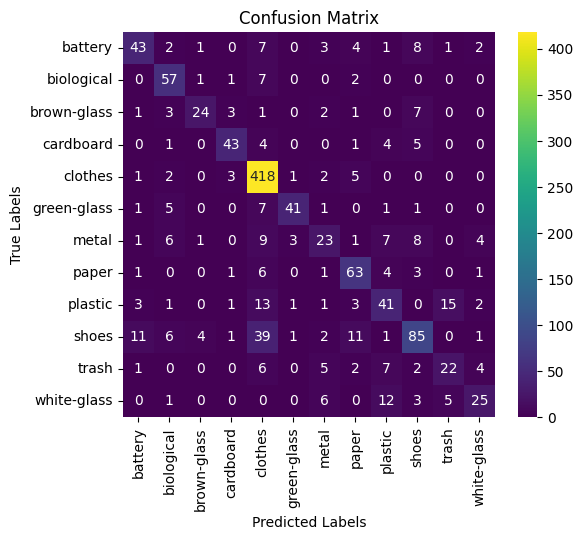

In [ ]:
#Error Analysis visualization

# Step 1: Get true labels and predictions from the test set
y_true = []
y_pred = []

# Collect true labels and predictions
for images, labels in test_dataset:
    preds = baseline_model.predict(images)  # Predict class probabilities
    y_true.extend(labels.numpy().astype(int))  # Convert true labels to int
    y_pred.extend(np.argmax(preds, axis=1))  # Get predicted class index

# Convert lists to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Step 2: Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Step 3: Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

# Step 4: Model Performance Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print performance metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")

# Step 5: Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## **Model 2: Optimized CNN**
Improving my model architecture with added optimizations:

* Adam Optimizer with a tunable learning rate
* L2 Regularization on Conv & Dense layers
* Dropout layers to prevent overfitting
* Early Stopping to stop training when validation loss stops improving
* Epoch tuning with a ReduceLROnPlateau scheduler


In [ ]:
# Define model function with optimizations
def create_optimized_model(initial_lr=0.0005, dropout_rate=0.4, l2_lambda=0.0005):
    inputs = keras.Input(shape=(224, 224, 3))  # Define input layer

    # Convolutional Block 1
    x = layers.Conv2D(32, (3, 3), padding='same',
                      kernel_regularizer=regularizers.l2(l2_lambda))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Convolutional Block 2
    x = layers.Conv2D(64, (3, 3), padding='same',
                      kernel_regularizer=regularizers.l2(l2_lambda))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Convolutional Block 3
    x = layers.Conv2D(128, (3, 3), padding='same',
                      kernel_regularizer=regularizers.l2(l2_lambda))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Fully Connected Layer 1
    x = layers.Dense(512, kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(l2_lambda))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(dropout_rate)(x)

    # Fully Connected Layer 2
    x = layers.Dense(256, kernel_initializer="he_normal", kernel_regularizer=regularizers.l2(l2_lambda))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(dropout_rate)(x)

    # Output Layer (12 classes)
    outputs = layers.Dense(12, activation='softmax')(x)

    # Build Model
    model = keras.Model(inputs=inputs, outputs=outputs)

    # Compile Model with AdamW optimizer
    model.compile(
        optimizer=AdamW(learning_rate=initial_lr, weight_decay=1e-5),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create the optimized model
optimized_model = create_optimized_model()

# Learning Rate Scheduler (Reduces LR dynamically)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-6, verbose=1)

# Early Stopping (Triggers Earlier for Shorter Training)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Apply Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

optimized_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,3

 Total params: 297,676 (1.14 MB)

 Trainable params: 295,692 (1.13 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
# Extract labels from train_dataset
y_train = np.concatenate([y.numpy() for _, y in train_dataset])

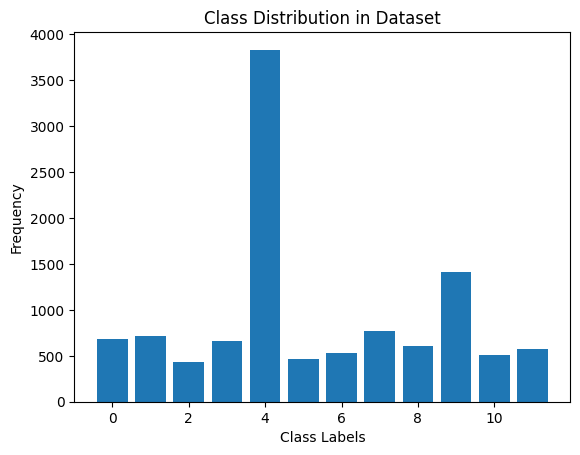

In [ ]:
# Get class distribution from labels
unique, counts = np.unique(y_train, return_counts=True)

# Plot class distribution
plt.bar(unique, counts)
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.title("Class Distribution in Dataset")
plt.show()

In [ ]:
# Compute class weights
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

# Convert to dictionary (ensure correct mapping)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print("Computed Class Weights:", class_weight_dict)

Computed Class Weights: {0: 1.3680351906158357, 1: 1.299442896935933, 2: 2.1448275862068966, 3: 1.4222560975609757, 4: 0.2433489827856025, 5: 2.0194805194805197, 6: 1.7637051039697542, 7: 1.213263979193758, 8: 1.5320197044334976, 9: 0.6612331679659815, 10: 1.822265625, 11: 1.61139896373057}


In [ ]:
# Train Model
history_optimized = optimized_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=15,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight_dict  # Add computed class weights
)

Epoch 1/15
350/350 ━━━━━━━━━━━━━━━━━━━━ 1400s 4s/step - accuracy: 0.3180 - loss: 2.9773 - val_accuracy: 0.1914 - val_loss: 3.1060 - learning_rate: 5.0000e-04
Epoch 2/15
350/350 ━━━━━━━━━━━━━━━━━━━━ 1447s 4s/step - accuracy: 0.4639 - loss: 2.4023 - val_accuracy: 0.5372 - val_loss: 2.1771 - learning_rate: 5.0000e-04
Epoch 3/15
350/350 ━━━━━━━━━━━━━━━━━━━━ 1402s 4s/step - accuracy: 0.4964 - loss: 2.2347 - val_accuracy: 0.5388 - val_loss: 2.0797 - learning_rate: 5.0000e-04
Epoch 4/15
350/350 ━━━━━━━━━━━━━━━━━━━━ 1375s 4s/step - accuracy: 0.5175 - loss: 2.1301 - val_accuracy: 0.6004 - val_loss: 1.8928 - learning_rate: 5.0000e-04
Epoch 5/15
350/350 ━━━━━━━━━━━━━━━━━━━━ 1420s 4s/step - accuracy: 0.5350 - loss: 2.0304 - val_accuracy: 0.5227 - val_loss: 2.0108 - learning_rate: 5.0000e-04
Epoch 6/15
350/350 ━━━━━━━━━━━━━━━━━━━━ 1420s 4s/step - accuracy: 0.5533 - loss: 1.9504 - val_accuracy: 0.6384 - val_loss: 1.6695 - learning_rate: 5.0000e-04
Epoch 7/15
350/350 ━━━━━━━━━━━━━━━━━━━━ 1456s 4s/ste

In [ ]:
# check model's performance on unseen test data after training
test_perf_optimize = optimized_model.evaluate(test_dataset)
print(f"Optimized Model - Test Loss: {test_perf_optimize[0]}, Test Accuracy: {test_perf_optimize[1]}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 31s 808ms/step - accuracy: 0.6922 - loss: 1.4016
Optimized Model - Test Loss: 1.3935388326644897, Test Accuracy: 0.6833881735801697


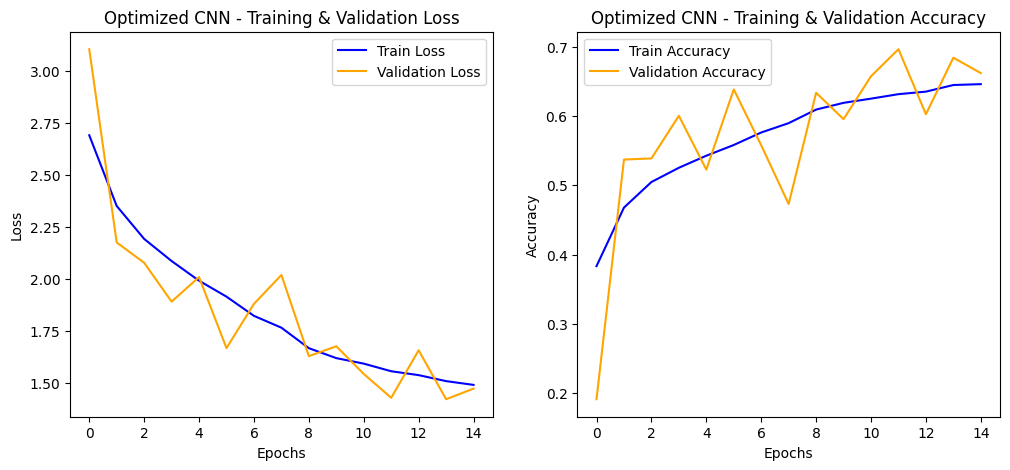

In [ ]:
# Improved Training & Validation Plot
def plot_history(history, model_name="Model"):
    plt.figure(figsize=(12, 5))

    # Training and Validation Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} - Training & Validation Loss')
    plt.legend()

    # Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Training & Validation Accuracy')
    plt.legend()

    plt.show()

# Plot the graphs
plot_history(history_optimized, "Optimized CNN")

First image to predict:
Actual label on dataset: plastic
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step
Predicted label by model: plastic


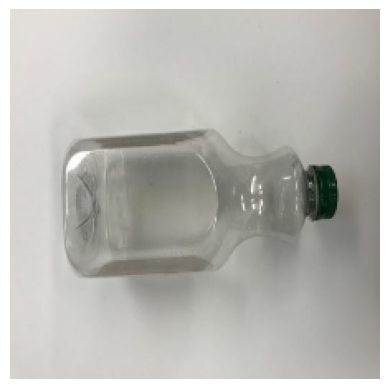

In [ ]:
# Making a single prediction
for images_batch, labels_batch in test_dataset.take(1):
    img_1 = images_batch[0].numpy()  # Remove 'uint8' conversion so image can retain [0, 1] instead of [0, 255]
    img1_label = labels_batch[0].numpy()

    print('First image to predict:')
    plt.imshow(img_1)
    print('Actual label on dataset:', class_names[img1_label])

    batch_prediction = optimized_model.predict(images_batch)
    predicted_label = class_names[np.argmax(batch_prediction[0])]

    print('Predicted label by model:', predicted_label)
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


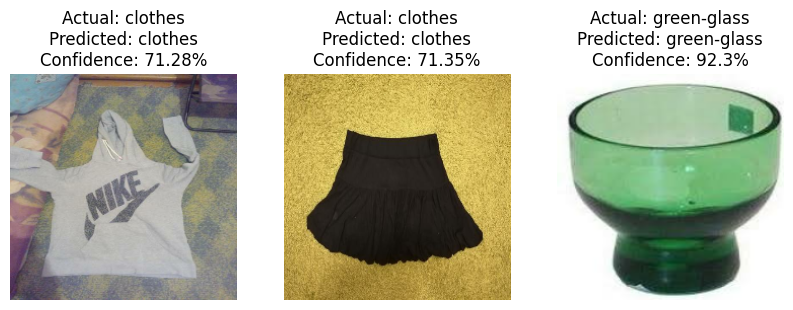

In [ ]:
# Making more predictions
def predict(model, img):
    # Convert image to array and expand dims for prediction
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Model expects batch format

    predictions = optimized_model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence_level = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence_level

plt.figure(figsize=(10, 10))
for images, labels in test_dataset.take(1):
    for i in range(3):  # Predict for 3 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())

        predicted_class, confidence_level = predict(baseline_model, images[i].numpy())
        actual_class = class_names[labels[i].numpy()]  # Ensure correct label index

        plt.title(f'Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence_level}%')
        plt.axis("off")

plt.show()

In [ ]:
#Save Optimized CNN using the .keras format

# Create the directory if it doesn't exist
os.makedirs("saved_models", exist_ok=True)

# Now save the model
optimized_model.save("saved_models/optimized_cnn.keras")

In [ ]:
print("Saved models:", os.listdir("saved_models"))

Saved models: ['baseline_cnn.keras', 'optimized_cnn.keras']


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 994ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 702ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/

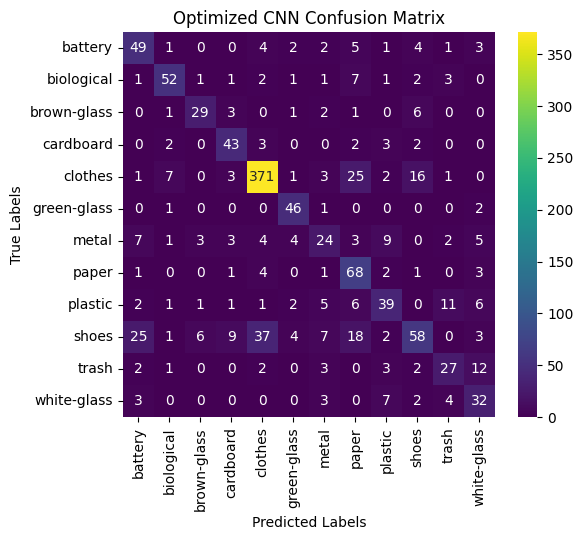

In [ ]:
#Error Analysis visualization

# Step 1: Get true labels and predictions from the test set
y_true = []
y_pred = []

# Collect true labels and predictions
for images, labels in test_dataset:
    preds = optimized_model.predict(images)  # Predict class probabilities
    y_true.extend(labels.numpy().astype(int))  # Convert true labels to int
    y_pred.extend(np.argmax(preds, axis=1))  # Get predicted class index

# Convert lists to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Step 2: Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Step 3: Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

# Step 4: Model Performance Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print performance metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")

# Step 5: Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=class_names, yticklabels=class_names)
plt.title('Optimized CNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# **Fine-Tuning Model 2**
I will fine-tune Model 2 by training it with five different hyperparameter settings (5 training instances). Each instance has a unique combination of:

* Optimizer (Adam, RMSprop, AdamW, SGD)
* Regularization (L1, L2, Dropout)
* Learning rate
* Dropout rate
* Epochs

In [ ]:
def create_finetuned_model(optimizer='adam', regularization=None, dropout_rate=0.0, l2_lambda=0.0, learning_rate=0.001):
    inputs = keras.Input(shape=(224, 224, 3))  # Define input layer

    # Convolutional Block 1
    x = layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularization)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Convolutional Block 2
    x = layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularization)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Convolutional Block 3
    x = layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularization)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Fully Connected Layer 1
    x = layers.Dense(512, kernel_initializer="he_normal", kernel_regularizer=regularization)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(dropout_rate)(x)

    # Fully Connected Layer 2
    x = layers.Dense(256, kernel_initializer="he_normal", kernel_regularizer=regularization)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(dropout_rate)(x)

    # Output Layer (12 classes)
    outputs = layers.Dense(12, activation='softmax')(x)

    # Build Model
    model = keras.Model(inputs=inputs, outputs=outputs)

    # Select Optimizer
    if optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'adamw':
        optimizer = keras.optimizers.AdamW(learning_rate=learning_rate, weight_decay=1e-5)
    elif optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

    # Compile Model
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Apply Learning Rate Scheduler & Early Stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Extract labels from train dataset
y_train = np.concatenate([y.numpy() for _, y in train_dataset])

In [ ]:
# Compute class weights
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print("Computed Class Weights:", class_weight_dict)

Computed Class Weights: {0: 1.3561046511627908, 1: 1.3103932584269662, 2: 2.135011441647597, 3: 1.4157814871016692, 4: 0.24360313315926893, 5: 2.0238611713665944, 6: 1.75046904315197, 7: 1.2180156657963446, 8: 1.5472636815920398, 9: 0.6584333098094566, 10: 1.8258317025440314, 11: 1.61139896373057}


## Instance 1

In [ ]:
optimized_cnn_model1 = create_finetuned_model(optimizer='adam', regularization=None, dropout_rate=0.0, l2_lambda=0.0, learning_rate=0.001)

history1 = optimized_cnn_model1.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    class_weight=class_weight_dict
)

Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2374s 7s/step - accuracy: 0.4210 - loss: 1.7149 - val_accuracy: 0.3832 - val_loss: 1.9890
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2293s 7s/step - accuracy: 0.5344 - loss: 1.3624 - val_accuracy: 0.3342 - val_loss: 2.6753
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2247s 6s/step - accuracy: 0.5695 - loss: 1.2565 - val_accuracy: 0.3645 - val_loss: 2.2505
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2346s 7s/step - accuracy: 0.6011 - loss: 1.1740 - val_accuracy: 0.4673 - val_loss: 1.5774
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2287s 6s/step - accuracy: 0.6091 - loss: 1.1206 - val_accuracy: 0.4850 - val_loss: 1.5840
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2264s 6s/step - accuracy: 0.6338 - loss: 1.0802 - val_accuracy: 0.3996 - val_loss: 1.9819
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2214s 6s/step - accuracy: 0.6316 - loss: 1.0546 - val_accuracy: 0.5988 - val_loss: 1.1632
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2520s 7s/step - accuracy: 0.6547 - loss: 0.9974 - 

In [ ]:
optimized_cnn_model1.save("saved_models/adam_model_instance_1.keras")

print("Saved models:", os.listdir("saved_models"))

Saved models: ['baseline_cnn.keras', 'adam_model_instance_1.keras', 'optimized_cnn.keras']


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 

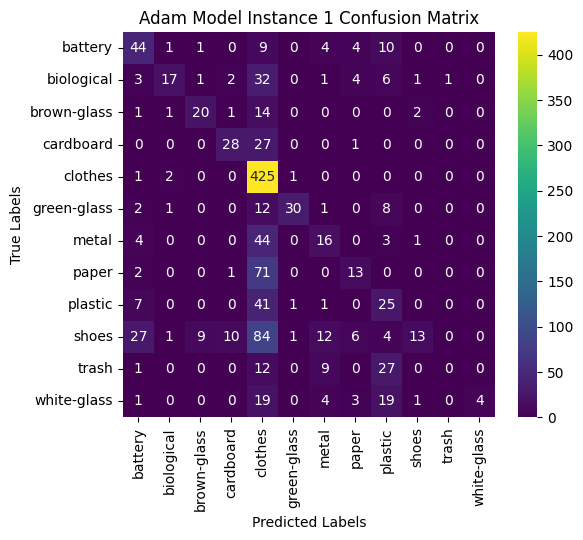

In [ ]:
#Error Analysis visualization

# Step 1: Get true labels and predictions from the test set
y_true = []
y_pred = []

# Collect true labels and predictions
for images, labels in test_dataset:
    preds = optimized_cnn_model1.predict(images)  # Predict class probabilities
    y_true.extend(labels.numpy().astype(int))  # Convert true labels to int
    y_pred.extend(np.argmax(preds, axis=1))  # Get predicted class index

# Convert lists to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Step 2: Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Step 3: Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

# Step 4: Model Performance Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print performance metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")

# Step 5: Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=class_names, yticklabels=class_names)
plt.title('Adam Model Instance 1 Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Instance 2

In [ ]:
optimized_cnn_model2 = create_finetuned_model(optimizer='adam', regularization=regularizers.l2(0.0005), dropout_rate=0.2, l2_lambda=0.001, learning_rate=0.0005)

history2 = optimized_cnn_model2.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight_dict
)

Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2433s 7s/step - accuracy: 0.3644 - loss: 2.7038 - val_accuracy: 0.2527 - val_loss: 3.0140 - learning_rate: 5.0000e-04
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2397s 7s/step - accuracy: 0.5085 - loss: 2.2282 - val_accuracy: 0.5540 - val_loss: 2.1439 - learning_rate: 5.0000e-04
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2323s 7s/step - accuracy: 0.5437 - loss: 2.0898 - val_accuracy: 0.4302 - val_loss: 2.6209 - learning_rate: 5.0000e-04
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2312s 7s/step - accuracy: 0.5558 - loss: 1.9711 - val_accuracy: 0.5185 - val_loss: 2.1385 - learning_rate: 5.0000e-04
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2316s 7s/step - accuracy: 0.5840 - loss: 1.8766 - val_accuracy: 0.5994 - val_loss: 1.9092 - learning_rate: 5.0000e-04
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2440s 7s/step - accuracy: 0.5881 - loss: 1.7938 - val_accuracy: 0.5617 - val_loss: 1.8749 - learning_rate: 5.0000e-04
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2312s 7s/ste

In [ ]:
optimized_cnn_model2.save("saved_models/adam_model_instance_2.keras")

print("Saved models:", os.listdir("saved_models"))

Saved models: ['adam_model_instance_2.keras', 'baseline_cnn.keras', 'adam_model_instance_1.keras', 'optimized_cnn.keras']


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

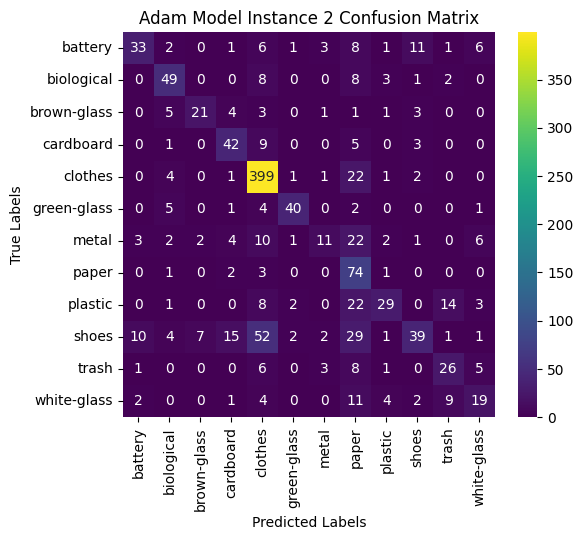

In [ ]:
#Error Analysis visualization

# Step 1: Get true labels and predictions from the test set
y_true = []
y_pred = []

# Collect true labels and predictions
for images, labels in test_dataset:
    preds = optimized_cnn_model2.predict(images)  # Predict class probabilities
    y_true.extend(labels.numpy().astype(int))  # Convert true labels to int
    y_pred.extend(np.argmax(preds, axis=1))  # Get predicted class index

# Convert lists to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Step 2: Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Step 3: Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

# Step 4: Model Performance Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print performance metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")

# Step 5: Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=class_names, yticklabels=class_names)
plt.title('Adam Model Instance 2 Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Instance 3

In [ ]:
optimized_cnn_model3 = create_finetuned_model(optimizer='rmsprop', regularization=regularizers.l2(0.0005), dropout_rate=0.3, l2_lambda=0.0005, learning_rate=0.0003)

history3 = optimized_cnn_model3.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=12,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight_dict
)

Epoch 1/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2201s 6s/step - accuracy: 0.3319 - loss: 2.7904 - val_accuracy: 0.1595 - val_loss: 3.4750 - learning_rate: 3.0000e-04
Epoch 2/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2125s 6s/step - accuracy: 0.4721 - loss: 2.3680 - val_accuracy: 0.5562 - val_loss: 2.0906 - learning_rate: 3.0000e-04
Epoch 3/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2110s 6s/step - accuracy: 0.5216 - loss: 2.2008 - val_accuracy: 0.5907 - val_loss: 1.9538 - learning_rate: 3.0000e-04
Epoch 4/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2103s 6s/step - accuracy: 0.5422 - loss: 2.0921 - val_accuracy: 0.4979 - val_loss: 2.5596 - learning_rate: 3.0000e-04
Epoch 5/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2116s 6s/step - accuracy: 0.5521 - loss: 2.0196 - val_accuracy: 0.5862 - val_loss: 1.9511 - learning_rate: 3.0000e-04
Epoch 6/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2092s 6s/step - accuracy: 0.5782 - loss: 1.9469 - val_accuracy: 0.6362 - val_loss: 1.7933 - learning_rate: 3.0000e-04
Epoch 7/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2176s 6s/ste

In [ ]:
optimized_cnn_model3.save("saved_models/rmsprop_model_instance.keras")

print("Saved models:", os.listdir("saved_models"))

Saved models: ['adam_model_instance_1.keras', 'rmsprop_model_instance.keras', 'adam_model_instance_2.keras', 'baseline_cnn.keras', 'optimized_cnn.keras']


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 995ms/step
1/1 ━━━━━━━━━━━━━━━━━━

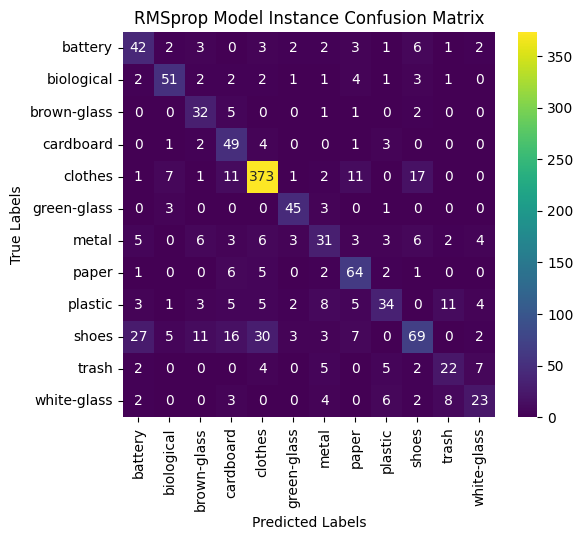

In [ ]:
#Error Analysis visualization

# Step 1: Get true labels and predictions from the test set
y_true = []
y_pred = []

# Collect true labels and predictions
for images, labels in test_dataset:
    preds = optimized_cnn_model3.predict(images)  # Predict class probabilities
    y_true.extend(labels.numpy().astype(int))  # Convert true labels to int
    y_pred.extend(np.argmax(preds, axis=1))  # Get predicted class index

# Convert lists to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Step 2: Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Step 3: Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

# Step 4: Model Performance Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print performance metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")

# Step 5: Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=class_names, yticklabels=class_names)
plt.title('RMSprop Model Instance Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Instance 4

In [ ]:
optimized_cnn_model4 = create_finetuned_model(optimizer='adamw', regularization=regularizers.l1_l2(l1=0.0001, l2=0.0001), dropout_rate=0.4, l2_lambda=0.0001, learning_rate=0.0001)

history4 = optimized_cnn_model4.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=12,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight_dict
)

Epoch 1/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2352s 7s/step - accuracy: 0.2338 - loss: 4.1518 - val_accuracy: 0.1022 - val_loss: 4.5348 - learning_rate: 1.0000e-04
Epoch 2/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2271s 6s/step - accuracy: 0.4036 - loss: 3.5934 - val_accuracy: 0.4592 - val_loss: 3.3645 - learning_rate: 1.0000e-04
Epoch 3/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2265s 6s/step - accuracy: 0.4493 - loss: 3.4100 - val_accuracy: 0.5537 - val_loss: 3.1426 - learning_rate: 1.0000e-04
Epoch 4/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2307s 6s/step - accuracy: 0.4715 - loss: 3.3470 - val_accuracy: 0.5140 - val_loss: 3.1934 - learning_rate: 1.0000e-04
Epoch 5/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2269s 6s/step - accuracy: 0.4848 - loss: 3.2902 - val_accuracy: 0.5627 - val_loss: 3.0502 - learning_rate: 1.0000e-04
Epoch 6/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2337s 7s/step - accuracy: 0.5088 - loss: 3.1968 - val_accuracy: 0.5820 - val_loss: 2.9603 - learning_rate: 1.0000e-04
Epoch 7/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2363s 7s/ste

In [ ]:
optimized_cnn_model4.save("saved_models/adamw_model_instance.keras")

print("Saved models:", os.listdir("saved_models"))

Saved models: ['optimized_cnn.keras', 'baseline_cnn.keras', 'adam_model_instance_2.keras', 'adamw_model_instance.keras', 'adam_model_instance_1.keras', 'rmsprop_model_instance.keras']


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

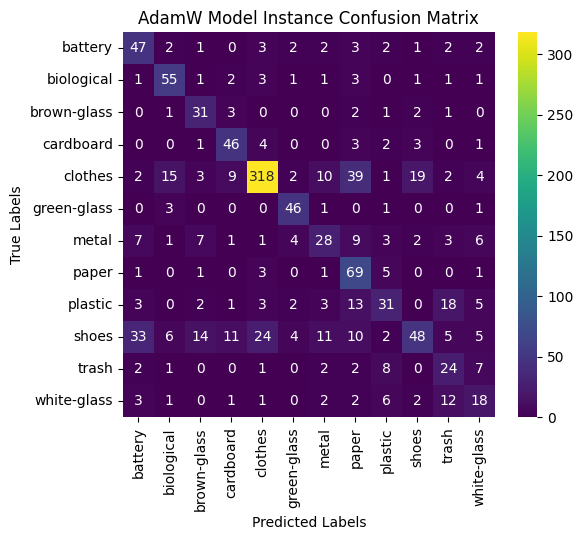

In [ ]:
#Error Analysis visualization

# Step 1: Get true labels and predictions from the test set
y_true = []
y_pred = []

# Collect true labels and predictions
for images, labels in test_dataset:
    preds = optimized_cnn_model4.predict(images)  # Predict class probabilities
    y_true.extend(labels.numpy().astype(int))  # Convert true labels to int
    y_pred.extend(np.argmax(preds, axis=1))  # Get predicted class index

# Convert lists to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Step 2: Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Step 3: Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

# Step 4: Model Performance Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print performance metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")

# Step 5: Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=class_names, yticklabels=class_names)
plt.title('AdamW Model Instance Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Instance 5

In [ ]:
optimized_cnn_model5 = create_finetuned_model(optimizer='sgd', regularization=None, dropout_rate=0.4, l2_lambda=0.0001, learning_rate=0.00005)

history5 = optimized_cnn_model5.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=12,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight_dict
)

Epoch 1/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2506s 7s/step - accuracy: 0.1001 - loss: 2.8315 - val_accuracy: 0.1022 - val_loss: 2.6850 - learning_rate: 5.0000e-05
Epoch 2/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2456s 7s/step - accuracy: 0.2122 - loss: 2.3071 - val_accuracy: 0.3413 - val_loss: 1.9521 - learning_rate: 5.0000e-05
Epoch 3/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2470s 7s/step - accuracy: 0.2674 - loss: 2.1214 - val_accuracy: 0.3983 - val_loss: 1.8437 - learning_rate: 5.0000e-05
Epoch 4/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2464s 7s/step - accuracy: 0.3081 - loss: 2.0352 - val_accuracy: 0.4222 - val_loss: 1.8197 - learning_rate: 5.0000e-05
Epoch 5/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2492s 7s/step - accuracy: 0.3284 - loss: 1.9646 - val_accuracy: 0.3909 - val_loss: 1.8344 - learning_rate: 5.0000e-05
Epoch 6/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2426s 7s/step - accuracy: 0.3499 - loss: 1.9276 - val_accuracy: 0.4438 - val_loss: 1.7016 - learning_rate: 5.0000e-05
Epoch 7/12
350/350 ━━━━━━━━━━━━━━━━━━━━ 2535s 7s/ste

In [ ]:
optimized_cnn_model5.save("saved_models/sgd_model_instance.keras")

print("Saved models:", os.listdir("saved_models"))

Saved models: ['adam_model_instance_2.keras', 'adam_model_instance_1.keras', 'sgd_model_instance.keras', 'rmsprop_model_instance.keras', 'optimized_cnn.keras', 'baseline_cnn.keras', 'adamw_model_instance.keras']


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

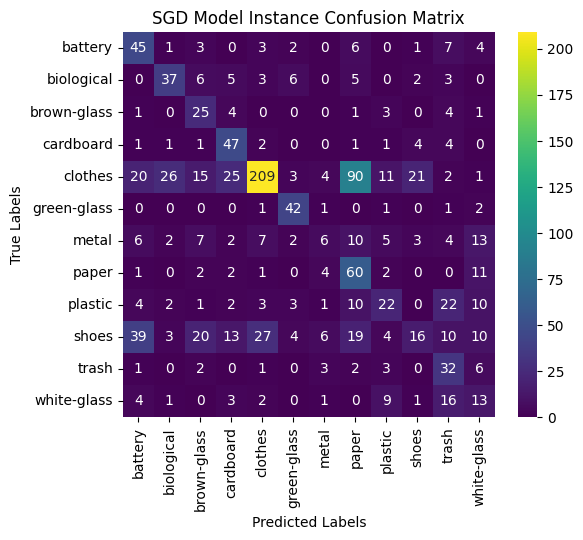

In [ ]:
#Error Analysis visualization

# Step 1: Get true labels and predictions from the test set
y_true = []
y_pred = []

# Collect true labels and predictions
for images, labels in test_dataset:
    preds = optimized_cnn_model5.predict(images)  # Predict class probabilities
    y_true.extend(labels.numpy().astype(int))  # Convert true labels to int
    y_pred.extend(np.argmax(preds, axis=1))  # Get predicted class index

# Convert lists to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Step 2: Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Step 3: Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

# Step 4: Model Performance Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print performance metrics
print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")

# Step 5: Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=class_names, yticklabels=class_names)
plt.title('SGD Model Instance Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# **Analysis of Fine-Tuning Model 2**
Fine-tuning Model 2 (the optimised CNN model) by training it with five different hyperparameter settings led to getting 5 training instances. Each instance had a unique combination of:

* Optimizer (Adam, RMSprop, AdamW, SGD)
* Regularization (L1, L2, Dropout)
* Learning rate
* Dropout rate
* Epochs

## **Best Fine-Tuned Instance Model**
Instance 3 (RMSprop + L2 Regularization, Dropout 0.3)

* Accuracy: 68.67% (Close to Model 2)
* More stable than Model 2, slightly worse than Baseline
* Indicates L2 regularization was useful, but AdamW didn't perform better than RMSprop in this case.

## **Model 3: Classical ML Model - SVM (Support Vector Machine)**

I used XGBoost but my Colab keeps crashing, so I'm going with SVM because it is;

* Less computationally intensive than deep learning.
* Good for classification tasks with high-dimensional data.
* Works well with smaller datasets compared to XGBoost.

In [ ]:
# Function to preprocess data for classical ML models
def preprocess_data_for_ml(dataset):
    X, y = [], []
    for images, labels in dataset:
        X.append(images.numpy().reshape(images.shape[0], -1))  # Flatten images
        y.append(labels.numpy())
    return np.vstack(X), np.hstack(y)  # Stack arrays efficiently

# Convert train, validation, and test datasets
X_train, y_train = preprocess_data_for_ml(train_dataset)
X_val, y_val = preprocess_data_for_ml(val_dataset)
X_test, y_test = preprocess_data_for_ml(test_dataset)

# Normalize using StandardScaler (zero-mean, unit variance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)  # Only transform validation set
X_test = scaler.transform(X_test)  # Only transform test set

# Initialize SVM model with hyperparameters
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr', random_state=42)

# Print Model Summary
print("SVM Model: Kernel = RBF, C = 1.0, Gamma = 'scale'")

SVM Model: Kernel = RBF, C = 1.0, Gamma = 'scale'


In [ ]:
# Train SVM model
print("Training SVM model... this may take some time.")
svm_model.fit(X_train, y_train)
print("Training Complete.")

Training SVM model... this may take some time.
Training Complete.


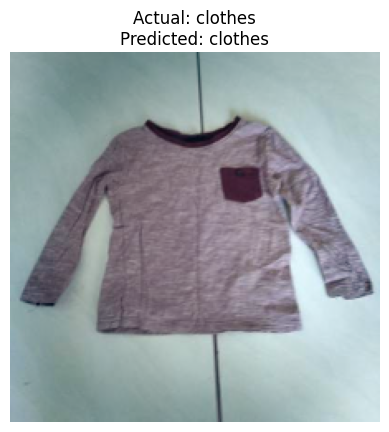

In [ ]:
# Select a random test image index
random_idx = np.random.randint(0, len(X_test))

# Extract the corresponding image and label
sample_img = X_test[random_idx].reshape(224, 224, 3)  # Reshape back to (H, W, C)
sample_label = y_test[random_idx]

# Make prediction
predicted_label = svm_model.predict([X_test[random_idx].flatten()])[0]  # Flatten input for SVM

# Rescale pixel values (if originally normalized)
sample_img = (sample_img - sample_img.min()) / (sample_img.max() - sample_img.min())  # Normalize to [0,1]

# Display image and prediction
plt.imshow(sample_img, cmap="gray")  # Remove cmap="gray" if working with RGB
plt.title(f"Actual: {class_names[sample_label]}\nPredicted: {class_names[predicted_label]}")
plt.axis("off")
plt.show()


Confusion Matrix:
 [[ 42   2   1   0   4   1   1   1   0  17   6   0]
 [  1  37   2   7  15   0   0   4   0   1   0   0]
 [  2   4  12   2   6   0   0   3   0  10   0   0]
 [  0   5   0  35  11   0   1   3   1   5   0   0]
 [  1   5   1   4 395   2   0   3   1   4   0   0]
 [  3   0   1   0   7  40   1   0   1   2   0   0]
 [  3   0   2   1  20   1  15   7   5  10   5   1]
 [  0   0   2   3  20   0   2  47   1   4   0   1]
 [  6   0   0   3  11   1   3  11  25   0  15   5]
 [ 17   3   3   4  62   1   2   9   1  66   3   1]
 [  0   0   0   0   5   0   2   5   2   5  24   6]
 [  0   1   0   1   9   0   0   9   8   2  13   9]]

Classification Report:
               precision    recall  f1-score   support

     battery       0.56      0.56      0.56        75
  biological       0.65      0.55      0.60        67
 brown-glass       0.50      0.31      0.38        39
   cardboard       0.58      0.57      0.58        61
     clothes       0.70      0.95      0.81       416
 green-glass     

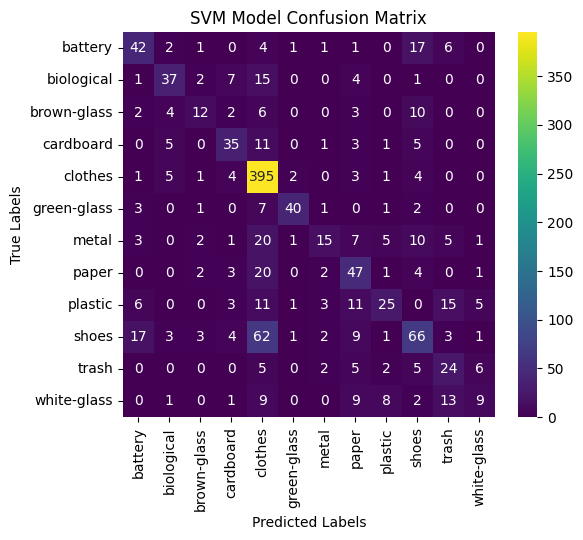

In [ ]:
# Make Predictions with SVM Model
y_pred_svm = svm_model.predict(X_test)  # Get predicted labels

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix:\n", conf_matrix_svm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm, target_names=class_names))

# Model Performance Metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

# Print performance metrics
print("\nSVM Model Performance Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision (Macro): {precision_svm:.4f}")
print(f"Recall (Macro): {recall_svm:.4f}")
print(f"F1 Score (Macro): {f1_svm:.4f}")

# Confusion Matrix Visualization for SVM
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='viridis', xticklabels=class_names, yticklabels=class_names)
plt.title('SVM Model Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Save the trained model using joblib since SVM models in scikit-learn don’t have a built-in .save() method like TensorFlow models
joblib.dump(svm_model, "saved_models/svm_model.pkl")

print("SVM model saved successfully.\nSaved models:", os.listdir("saved_models"))

SVM model saved successfully.
Saved models: ['optimized_cnn.keras', 'baseline_cnn.keras', 'rmsprop_model_instance.keras', 'adam_model_instance_1.keras', 'sgd_model_instance.keras', 'adamw_model_instance.keras', 'svm_model.pkl', 'adam_model_instance_2.keras']


## **The Overall Best Performing Model: Baseline Model (Model 1)**

* Accuracy: 72.78% (Highest)
* Precision: 68.17% (Highest)
* F1 Score: 64.84% (Highest)
* Best Balance of Performance Across All Metrics

## **Why?**

* Model 1 had no regularization but still outperformed all fine-tuned instances and Model 2
*  Its simpler architecture was less prone to overfitting compared to models with L2 regularization + dropout
* Adam optimizer with default learning rate provided stable convergence

In essence, fine-tuning in Model 2 (Optimized) didn't significantly improve the model. Instead, it slightly reduced accuracy.

#Task: Make Predictions using the best saved model (Baseline Model)


I have made predictions above using the best model just like I did for majority of the models after training